In [148]:
import pandas as pd  # Data manipulation and CSV handling.
import csv    # Reading/writing CSV files.
import plotly.express as px  # Interactive visualizations. (new library has been used)
import seaborn as sns   # Data visualization (plots). (new library has been used)
import matplotlib.pyplot as plt # Plotting tool.
import psycopg2 # PostgreSQL database connection. ( new library has been used)
from sqlalchemy import create_engine  # Database query execution.

In [149]:
# Load the CSV file into a DataFrame
data_origin = pd.read_csv("C:/Users/61433/Desktop/Project-3-Group-2/Data\healthcare_dataset.csv")

# Open the CSV file and list the headers using CSV library
with open("C:/Users/61433/Desktop/Project-3-Group-2/Data/healthcare_dataset.csv", mode='r') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Get the first row as headers

print(headers)

['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [150]:
# Get 1000 random rows
df = data_origin.sample(n=1000, random_state=1, replace=True)

#save these random rows to a new CSV file
df.to_csv('random_rows.csv', index=False)



In [151]:
# Standardize capitalisation
df['Name'] = df['Name'].str.title()
df['Doctor'] = df['Doctor'].str.title()
df['Hospital'] = df['Hospital'].str.title()
df['Medical Condition'] = df['Medical Condition'].str.capitalize()
df['Gender'] = df['Gender'].str.capitalize()
df['Test Results'] = df['Test Results'].str.capitalize()
df['Medication'] = df['Medication'].str.capitalize()

# Data type conversion
df['Age'] = df['Age'].astype(int)
df['Billing Amount'] = df['Billing Amount'].astype(float)
df['Room Number'] = df['Room Number'].astype(int)

# dropping missing values
df = df.dropna() 

#Standardize categorical data
df['Blood Type'] = df['Blood Type'].str.upper()
df['Admission Type'] = df['Admission Type'].str.capitalize()

# Removing titles from names 
df['Name'] = df['Name'].str.replace(r'\b(Dr\.?|Mrs\.?|Ms\.?|Mr\.?)\s*', '', regex=True)

# Remove duplicates
df = df.drop_duplicates()

first_10_records = df.head(10)
print(first_10_records)


                     Name  Age  Gender Blood Type Medical Condition  \
33003         Jon Proctor   58  Female         A-          Diabetes   
12172    Michelle Roberts   28  Female         B-            Asthma   
5192   Robert Daniels Jr.   78    Male         A+         Arthritis   
32511       Glenn Estrada   33  Female         B-         Arthritis   
50057        Brenda Davis   42  Female         B-            Cancer   
43723       Mackenzie Cox   48  Female         B+            Cancer   
7813         Michael Kemp   51  Female        AB+          Diabetes   
52047        April Reeves   65    Male         O-          Diabetes   
21440          Dawn Avila   64    Male         O-      Hypertension   
32912        Jonathan Lee   27  Female         B-            Cancer   

      Date of Admission            Doctor                      Hospital  \
33003        2023-02-18      James Nelson                Griffin-Foster   
12172        2020-09-04         Lisa Hess      Walker Blake, And Hug

In [152]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [153]:
# Ensure all values in 'Name' are strings
df['Name'] = df['Name'].astype(str)

# Function to split names
def split_name(name):
    parts = name.split(' ', 1)
    first_name = parts[0]
    last_name = parts[1] if len(parts) > 1 else None
    return pd.Series([first_name, last_name])

# Apply the function to the 'Name' column and create 'First_name' and 'Last_name' columns
df[['First_name', 'Last_name']] = df['Name'].apply(split_name)

# Display the first few rows to check the result
print(df.head())

                     Name  Age  Gender Blood Type Medical Condition  \
33003         Jon Proctor   58  Female         A-          Diabetes   
12172    Michelle Roberts   28  Female         B-            Asthma   
5192   Robert Daniels Jr.   78    Male         A+         Arthritis   
32511       Glenn Estrada   33  Female         B-         Arthritis   
50057        Brenda Davis   42  Female         B-            Cancer   

      Date of Admission           Doctor                  Hospital  \
33003        2023-02-18     James Nelson            Griffin-Foster   
12172        2020-09-04        Lisa Hess  Walker Blake, And Hughes   
5192         2022-11-22  Nicholas Graves             Robles-Fisher   
32511        2021-05-25  Matthew Goodman            Nixon Sons And   
50057        2021-03-16      Eric Hudson                Curtis Plc   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
33003              Cigna    19092.692951          491       Elective   
12172   

In [154]:
# Drop column 'Name'
df.drop(columns=['Name'], inplace=True)

print(df.head())

       Age  Gender Blood Type Medical Condition Date of Admission  \
33003   58  Female         A-          Diabetes        2023-02-18   
12172   28  Female         B-            Asthma        2020-09-04   
5192    78    Male         A+         Arthritis        2022-11-22   
32511   33  Female         B-         Arthritis        2021-05-25   
50057   42  Female         B-            Cancer        2021-03-16   

                Doctor                  Hospital Insurance Provider  \
33003     James Nelson            Griffin-Foster              Cigna   
12172        Lisa Hess  Walker Blake, And Hughes           Medicare   
5192   Nicholas Graves             Robles-Fisher              Aetna   
32511  Matthew Goodman            Nixon Sons And           Medicare   
50057      Eric Hudson                Curtis Plc              Cigna   

       Billing Amount  Room Number Admission Type Discharge Date   Medication  \
33003    19092.692951          491       Elective     2023-03-14      Aspirin

In [155]:
print(df.columns)


Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'First_name', 'Last_name'],
      dtype='object')


In [156]:
# Desired column order
new_order = [
    'First_name', 'Last_name', 'Age', 'Gender', 'Blood Type', 
    'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 
    'Insurance Provider', 'Billing Amount', 'Room Number', 
    'Admission Type', 'Discharge Date', 'Medication', 'Test Results'
]

# Reorder columns
df = df[new_order]

print(df.head())

      First_name    Last_name  Age  Gender Blood Type Medical Condition  \
33003        Jon      Proctor   58  Female         A-          Diabetes   
12172   Michelle      Roberts   28  Female         B-            Asthma   
5192      Robert  Daniels Jr.   78    Male         A+         Arthritis   
32511      Glenn      Estrada   33  Female         B-         Arthritis   
50057     Brenda        Davis   42  Female         B-            Cancer   

      Date of Admission           Doctor                  Hospital  \
33003        2023-02-18     James Nelson            Griffin-Foster   
12172        2020-09-04        Lisa Hess  Walker Blake, And Hughes   
5192         2022-11-22  Nicholas Graves             Robles-Fisher   
32511        2021-05-25  Matthew Goodman            Nixon Sons And   
50057        2021-03-16      Eric Hudson                Curtis Plc   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
33003              Cigna    19092.692951          491   

In [157]:
# Convert date columns to ISO 8601 format (YYYY-MM-DD)
df['Date of Admission'] = pd.to_datetime(df['Date of Admission']).dt.strftime('%Y-%m-%d')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date']).dt.strftime('%Y-%m-%d')

# Display the first few rows to check the result
print(df.head())

      First_name    Last_name  Age  Gender Blood Type Medical Condition  \
33003        Jon      Proctor   58  Female         A-          Diabetes   
12172   Michelle      Roberts   28  Female         B-            Asthma   
5192      Robert  Daniels Jr.   78    Male         A+         Arthritis   
32511      Glenn      Estrada   33  Female         B-         Arthritis   
50057     Brenda        Davis   42  Female         B-            Cancer   

      Date of Admission           Doctor                  Hospital  \
33003        2023-02-18     James Nelson            Griffin-Foster   
12172        2020-09-04        Lisa Hess  Walker Blake, And Hughes   
5192         2022-11-22  Nicholas Graves             Robles-Fisher   
32511        2021-05-25  Matthew Goodman            Nixon Sons And   
50057        2021-03-16      Eric Hudson                Curtis Plc   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
33003              Cigna    19092.692951          491   

In [158]:
# Save the updated DataFrame to a new CSV file
df.to_csv('cleaned_healthcare_dataset.csv', index=False)

In [159]:
# This part of code generates and saves patient, admission, medication, and test results data into four separate CSV files.

# Generate PatientID as a unique identifier for each patient
df['PatientID'] = range(1, len(df) + 1)

# Patient Table
# Create a DataFrame with relevant patient information and save to a CSV file
patient_df = df[['PatientID', 'First_name', 'Last_name', 'Age', 'Gender', 'Blood Type', 'Medical Condition']]
patient_df.to_csv('Patient_Table.csv', index=False)

# Generate AdmissionID as a unique identifier for each admission
df['AdmissionID'] = range(1, len(df) + 1)

# Admission Table
# Create a DataFrame with admission-related information, linking it to the PatientID, and save to a CSV file
admission_df = df[['AdmissionID', 'PatientID', 'Date of Admission', 'Doctor', 'Hospital', 
                   'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date']]
admission_df.to_csv('Admission_Table.csv', index=False)

# Medication Table
# Generate a unique MedicationID for each entry
medication_df = df[['AdmissionID', 'Medication']].copy()  
medication_df.loc[:, 'MedicationID'] = range(1, len(medication_df) + 1)  # Use .loc to set values

# Save the Medication table to a CSV file
medication_df[['MedicationID', 'AdmissionID', 'Medication']].to_csv('Medication_Table.csv', index=False)

# Test Results Table
# Generate a unique TestResultID for each entry
test_results_df = df[['AdmissionID', 'Test Results']].copy()  
test_results_df.loc[:, 'TestResultID'] = range(1, len(test_results_df) + 1)  

# Save the Test Results table to a CSV file
test_results_df[['TestResultID', 'AdmissionID', 'Test Results']].to_csv('Test_Results_Table.csv', index=False)


print("CSV files created: Patient_Table.csv, Admission_Table.csv, Medication_Table.csv, Test_Results_Table.csv")


CSV files created: Patient_Table.csv, Admission_Table.csv, Medication_Table.csv, Test_Results_Table.csv


In [93]:
# This code establishes a connection to a PostgreSQL database using the provided parameters,
# tests the connection by retrieving the database version, and then closes the connection.


# Define connection parameters
conn_params = {
    'dbname': 'healthcare',
    'user': 'postgres',
    'password': 'Radin@5286',
    'host': 'localhost',  
    'port': '5432'        
}

try:
    # Establish the connection
    conn = psycopg2.connect(**conn_params)
    
    # Create a cursor object
    cursor = conn.cursor()

    # Test the connection
    cursor.execute("SELECT version();")
    db_version = cursor.fetchone()
    print(f"Connected to database. Version: {db_version}")

    # Close the cursor and connection
    cursor.close()
    conn.close()
except Exception as e:
    print(f"Error: {e}")

Connected to database. Version: ('PostgreSQL 16.3, compiled by Visual C++ build 1939, 64-bit',)


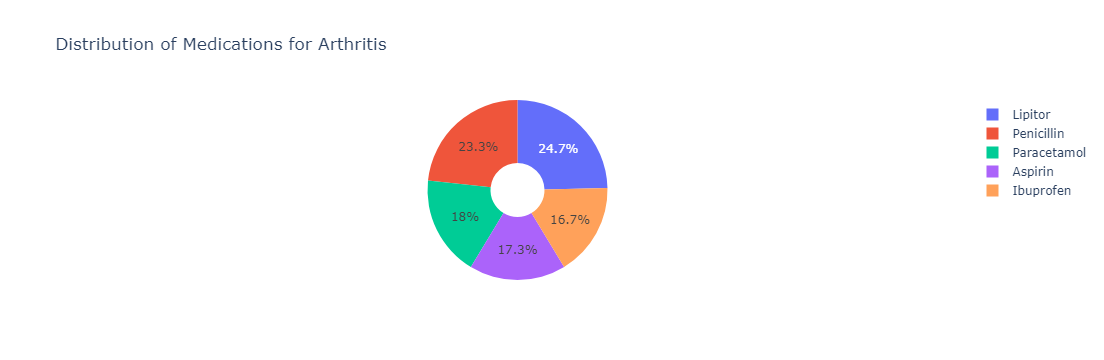

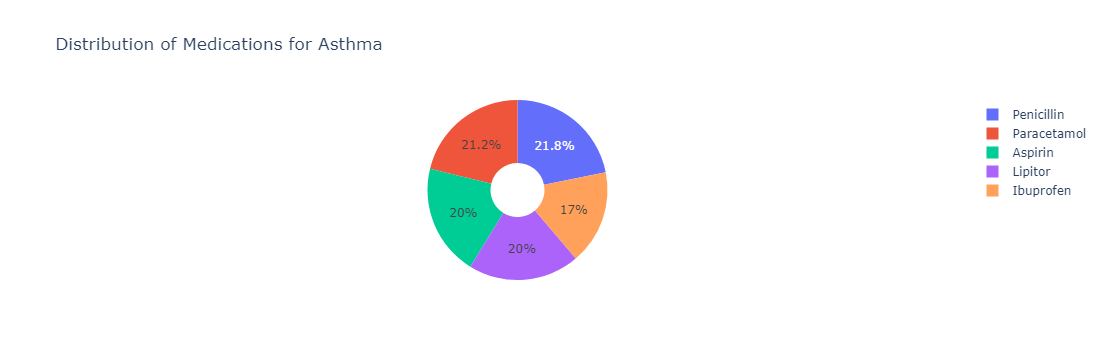

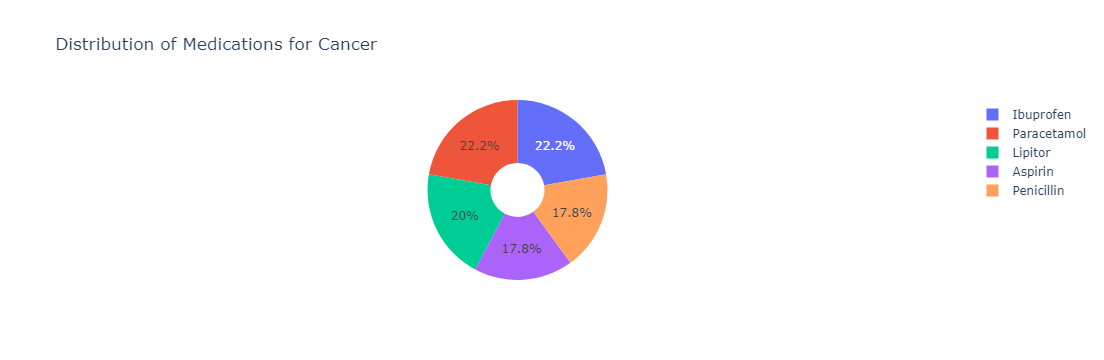

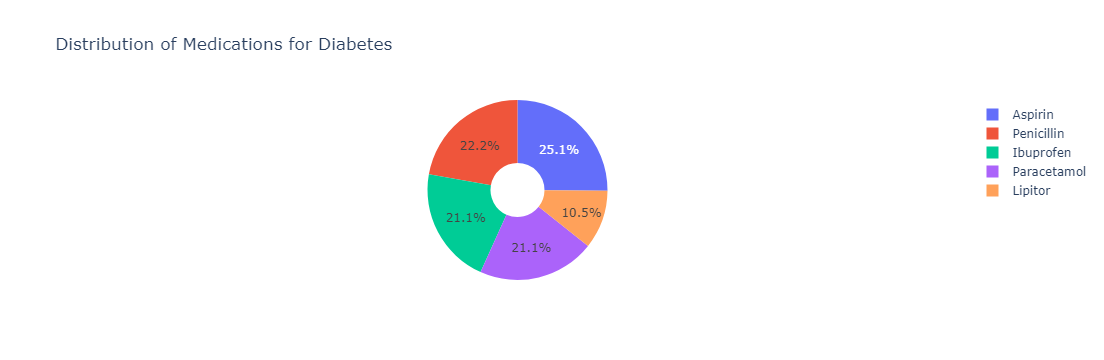

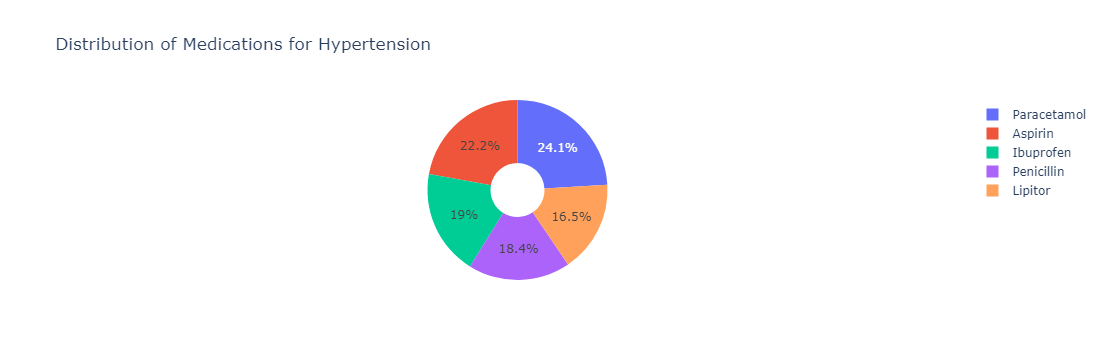

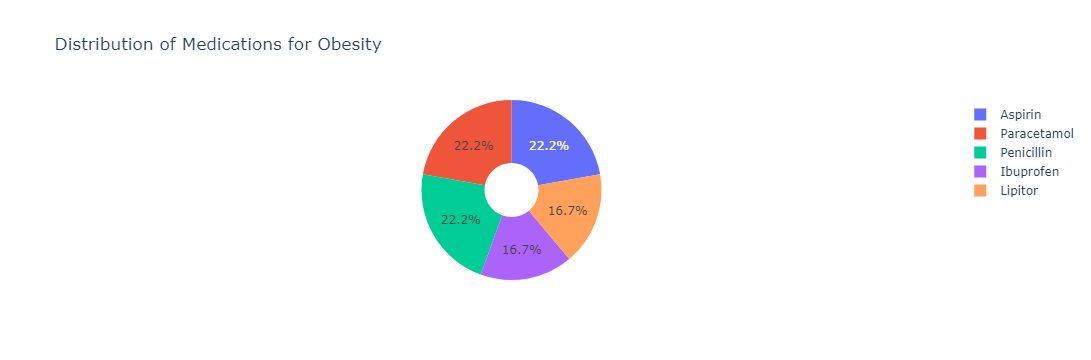

In [160]:
#What is the distribution of medication types across different medical conditions?

# Define connection parameters
conn_params = {
    'dbname': 'healthcare',
    'user': 'postgres',
    'password': 'Radin@5286',
    'host': 'localhost',
    'port': '5432'
}

# Create the connection string manually to handle special characters
# URL encoding the password if it contains special characters
password = conn_params['password'].replace('@', '%40')
engine = create_engine(f'postgresql+psycopg2://{conn_params["user"]}:{password}@{conn_params["host"]}:{conn_params["port"]}/{conn_params["dbname"]}')

# Read data from the database into a DataFrame
query = """
SELECT pt."Medical_Condition", mt."Medication"
FROM "Medication_Table" mt
JOIN "Admission_Table" at ON mt."AdmissionID" = at."AdmissionID"
JOIN "Patient_Table" pt ON at."PatientID" = pt."PatientID";
"""

df = pd.read_sql(query, engine)

# Group by 'Medical Condition' and 'Medication', then count occurrences
med_condition_distribution = df.groupby(['Medical_Condition', 'Medication']).size().reset_index(name='Count')

# Loop to create an interactive pie chart for each medical condition
for condition in med_condition_distribution['Medical_Condition'].unique():
    # Filter data for the specific condition
    condition_data = med_condition_distribution[med_condition_distribution['Medical_Condition'] == condition]
    
    # Create an interactive pie chart using Plotly
    fig = px.pie(condition_data, values='Count', names='Medication', title=f'Distribution of Medications for {condition}', hole=0.3)
    
    # Show the plot
    fig.show()

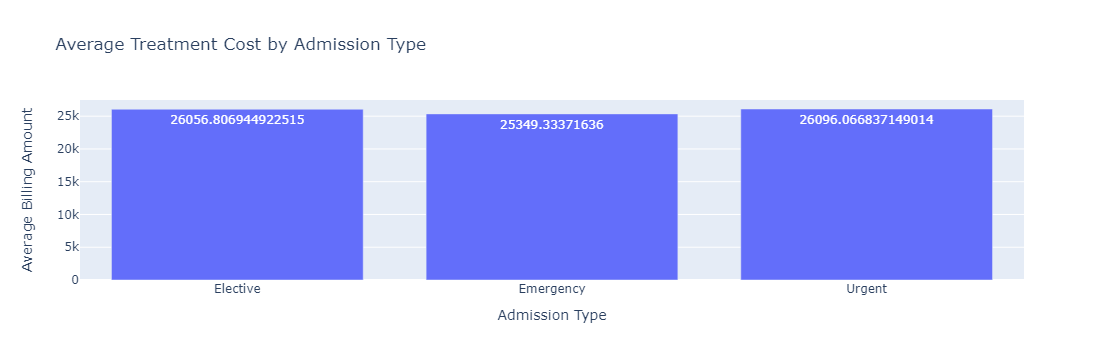

In [163]:
#How does the cost of treatment vary with different admission types?

# Define connection parameters
conn_params = {
    'dbname': 'healthcare',
    'user': 'postgres',
    'password': 'Radin@5286',
    'host': 'localhost',
    'port': '5432'
}

# URL encoding the password if it contains special characters
password = conn_params['password'].replace('@', '%40')
engine = create_engine(f'postgresql+psycopg2://{conn_params["user"]}:{password}@{conn_params["host"]}:{conn_params["port"]}/{conn_params["dbname"]}')

# Read data from the database into a DataFrame
query = """
SELECT "Admission_Type", "Billing_Amount"
FROM "Admission_Table";
"""

df = pd.read_sql(query, engine)

# Group by 'Admission_Type' and calculate average billing amount
cost_by_admission_type = df.groupby('Admission_Type')['Billing_Amount'].mean().reset_index()

# Create a bar chart to visualize the cost variation
fig = px.bar(cost_by_admission_type, x='Admission_Type', y='Billing_Amount',
             title='Average Treatment Cost by Admission Type',
             labels={'Billing_Amount': 'Average Billing Amount', 'Admission_Type': 'Admission Type'},
             text='Billing_Amount')  # Ensure this column exists in your DataFrame

# Show the plot
fig.show()

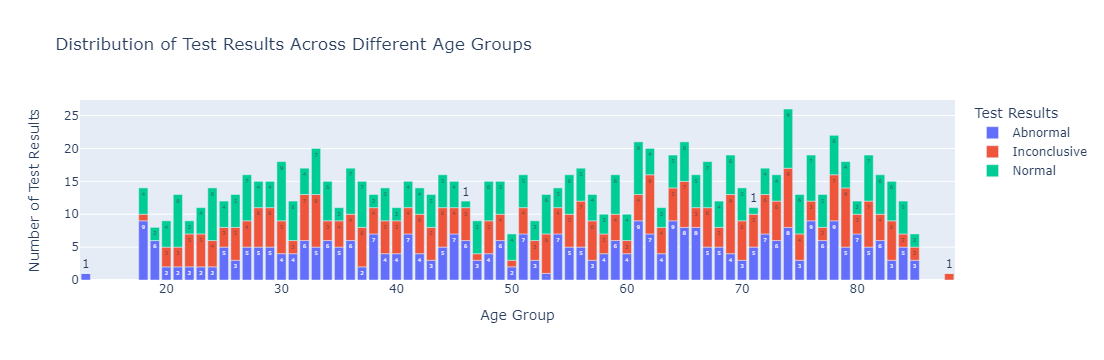

In [139]:
#What is the distribution of test results across different age groups?

# Define connection parameters
conn_params = {
    'dbname': 'healthcare',
    'user': 'postgres',
    'password': 'Radin@5286',
    'host': 'localhost',
    'port': '5432'
}

# URL encoding the password if it contains special characters
password = conn_params['password'].replace('@', '%40')
engine = create_engine(f'postgresql+psycopg2://{conn_params["user"]}:{password}@{conn_params["host"]}:{conn_params["port"]}/{conn_params["dbname"]}')

# Read data from the database into a DataFrame
query = """
SELECT pt."Age", tr."Test_Results"
FROM "Test_Results_Table" tr
JOIN "Admission_Table" at ON tr."AdmissionID" = at."AdmissionID"
JOIN "Patient_Table" pt ON at."PatientID" = pt."PatientID";
"""

df = pd.read_sql(query, engine)

# Group by 'Age' and 'Test Results', then count occurrences
age_test_distribution = df.groupby(['Age', 'Test_Results']).size().reset_index(name='Count')

# Create a pivot table for stacked bar chart
pivot_table = age_test_distribution.pivot(index='Age', columns='Test_Results', values='Count').fillna(0)

# Reset index to use 'Age' as a column
pivot_table.reset_index(inplace=True)

# Melt the pivot table for Plotly compatibility
melted_df = pivot_table.melt(id_vars='Age', var_name='Test Results', value_name='Count')

# Create the interactive stacked bar chart
fig = px.bar(melted_df, x='Age', y='Count', color='Test Results', 
             title='Distribution of Test Results Across Different Age Groups',
             labels={'Count': 'Number of Test Results', 'Age': 'Age Group'},
             text='Count')

# Show the plot
fig.show()